In [78]:
import matplotlib.pyplot as plt

In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',header=0,delimiter=',',encoding='utf-8')
df

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,8.6,8.9,7.7,6.7,7.9,6.6,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,3.7,4.1,3.1,3.4,5.5,5.7,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,8.8,9.5,9.5,8.5,9.0,8.5,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,2.7,2.8,6.2,5.2,4.1,4.3,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [81]:
import seaborn as sns

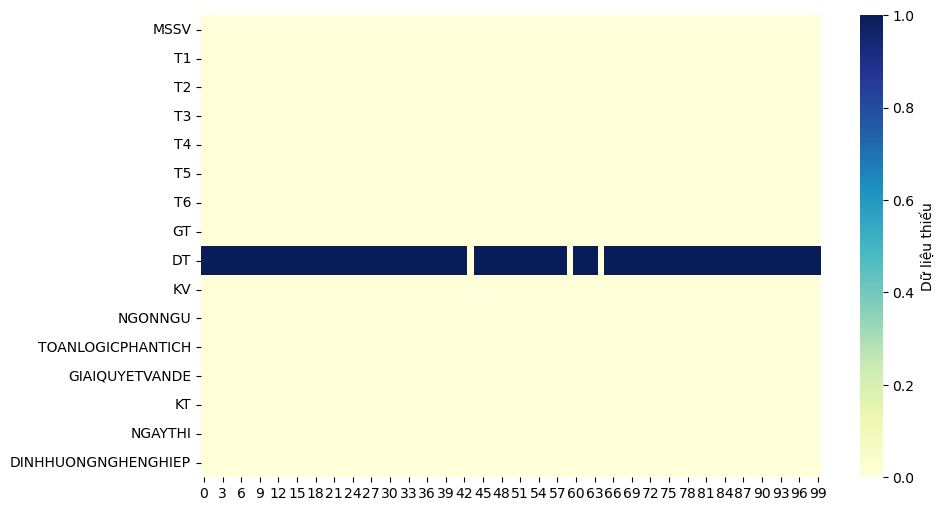

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu', cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png',dpi=100)
plt.show()

In [83]:
#điền giá trị thiếu
df['DT'].fillna('KINH',inplace=True)
#Lưu ý với biến định tính ta có thể thay 
#bằng giá trị yếu vị(node)
#df['DT'].fillna(df['DT'])

In [84]:
df.rename(columns={
    "TOANLOGICPHANTICH" : "LOGIC",
    "GIAIQUYETVANDE" : "UNGXU",
    "DINHHUONGNGHENGHIEP" : "HUONGNGHIEP"
}, inplace=True)

In [85]:
#điền thiếu giá trị phần NGONNGU bằng 0 ( nếu có)
#df['NGONNGU'].fillna(0,inplace=True)
#Điền thiếu giá trị LOGIC bằng trung bình(nếu có)
df['LOGIC'].fillna(df['LOGIC'].mean(),inplace=True)
#Điền thiếu giá trị phần UUNGWXXU bằng trung vị 
df['UNGXU'].fillna(df['UNGXU'].median(), inplace=True)
#Lưu ý: Với biến định lượng thì ta nên thay bằng trung vị

In [86]:
df['TBTOAN'] = (df['T5']+df['T6'])/2

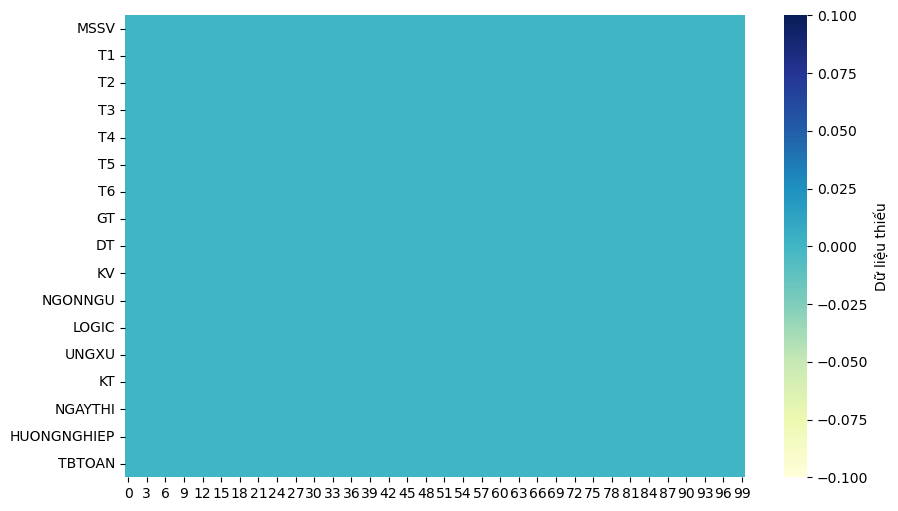

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu', cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png',dpi=100)
plt.show()

In [88]:
df.loc[df['TBTOAN'] < 5.0, 'XEPLOAI'] = 'FAIL'

df.loc[(df['TBTOAN'] >= 5.0) &
(df['TBTOAN'] <7.0), 'XEPLOAI'] ='FAIR'

df.loc[(df['TBTOAN'] >= 7.0) &
(df['TBTOAN'] < 9.0), 'XEPLOAI'] ='GOOD'

df.loc[df['TBTOAN'] >= 9.0, 'XEPLOAI'] = 'EXCEL'

In [89]:
df.loc[5]

MSSV               SV006
T1                   9.3
T2                   9.6
T3                   7.1
T4                   8.5
T5                   8.5
T6                   7.8
GT                     M
DT                  KINH
KV                     1
NGONNGU              1.5
LOGIC                4.0
UNGXU                6.0
KT                    D1
NGAYTHI        12/7/2018
HUONGNGHIEP           No
TBTOAN              8.15
XEPLOAI             GOOD
Name: 5, dtype: object

In [90]:
dict_map = {
    'A1' : 'G1', 'C' : 'G3', 'D1' : 'G3', 'A': 'G1','B':'G2'
}
df['NHOMKT'] = df['KT'].map(dict_map)

In [91]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y>= 5.0):
        return 1.0
    else:
        return 0.0
    
df['DIEMCONG'] = list(map(fplus,df['NHOMKT'],df['TBTOAN']))

In [92]:
df[['NHOMKT','TBTOAN','DIEMCONG']].head(5)

,NHOMKT,TBTOAN,DIEMCONG
0,G1,7.15,1.0
1,G3,3.50,0.0
2,G3,5.25,0.0
3,G3,6.75,0.0
4,G1,7.40,1.0


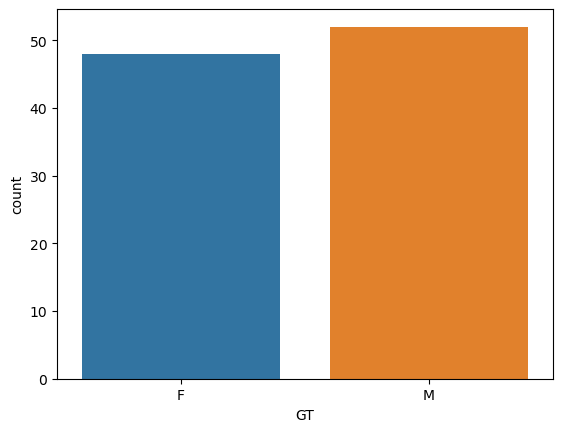

In [93]:
#Trực quan số lượng học sinh theo giới tính
sns.countplot(x='GT', data=df)
plt.show()

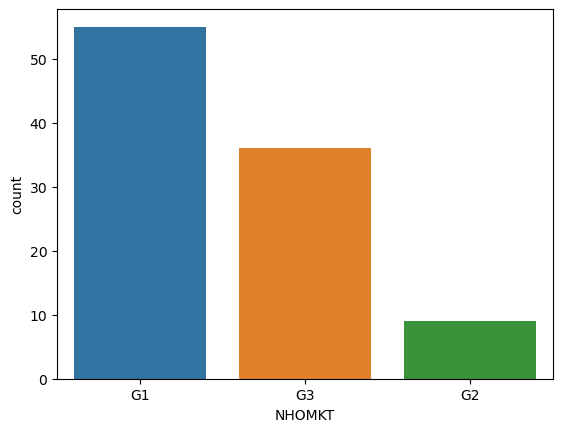

In [94]:
sns.countplot(x='NHOMKT', data=df)
plt.show()

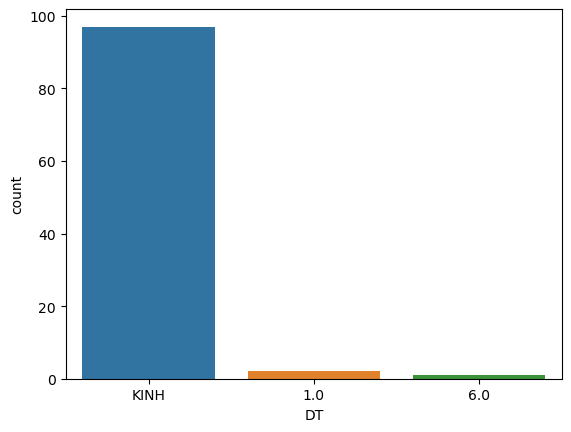

In [95]:
sns.countplot(x='DT', data=df)
plt.show()

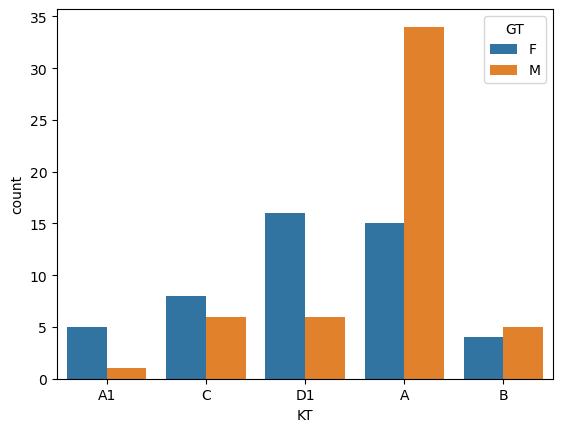

In [96]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

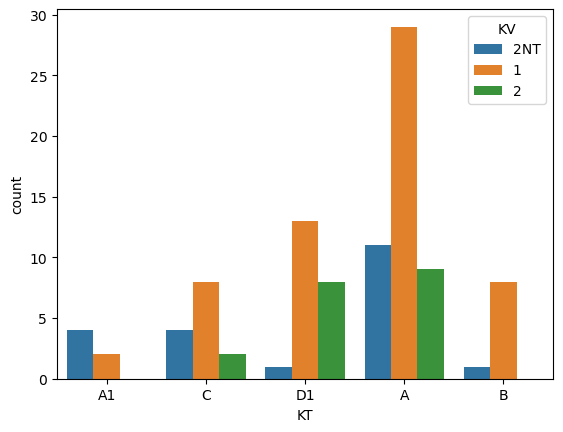

In [97]:
#tương tự biến định tính (KV, KT)
#Hãy cho biết khối A có sinh viên khu vực nào đăng ký cao nhất
sns.countplot(x='KT', hue='KV',data=df)
plt.show()

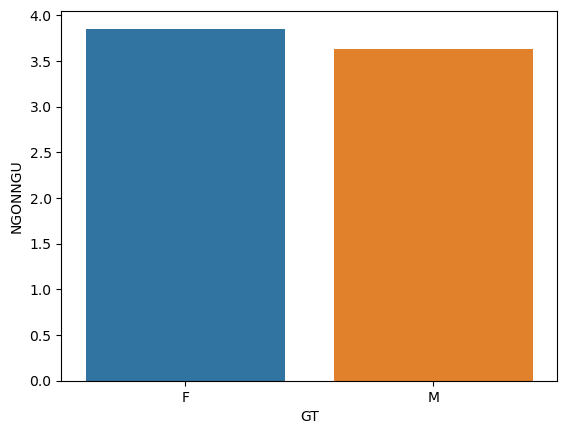

In [98]:
#So sánh điểm trung bình NGONNGU theo nhóm giới tính
sns.barplot(x='GT', y='NGONNGU', data=df, errorbar=None)
plt.show()

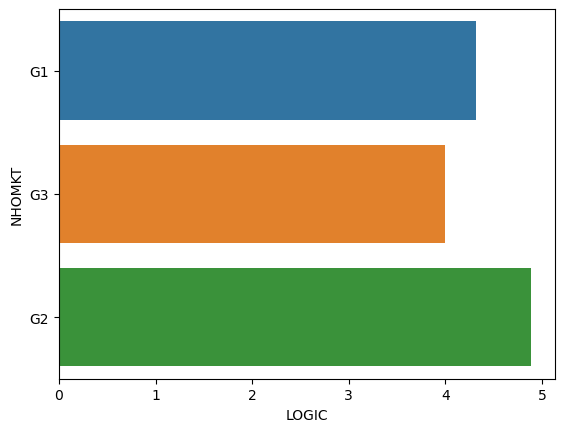

In [99]:
#So sánh trung bình điển LOGIC theo NHOMKT
#Cho biết khối nào có điểm thi LOGIC cao nhất
sns.barplot(x='LOGIC', y='NHOMKT', data=df, errorbar=None)
plt.show()

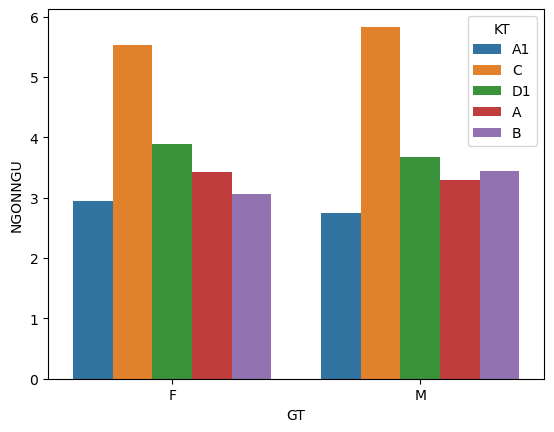

In [100]:
sns.barplot(x='GT',y='NGONNGU', hue='KT',data=df, errorbar=None)
plt.show()

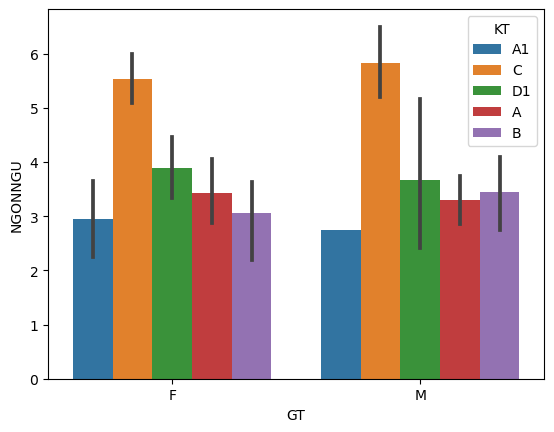

In [101]:
#so sánh sai số trên NGONNGU theo nhóm GT theo KT
#ngắn là đáng tin
#dài là sai số nhiều
sns.barplot(x='GT', y='NGONNGU', hue='KT',data=df)
plt.show()

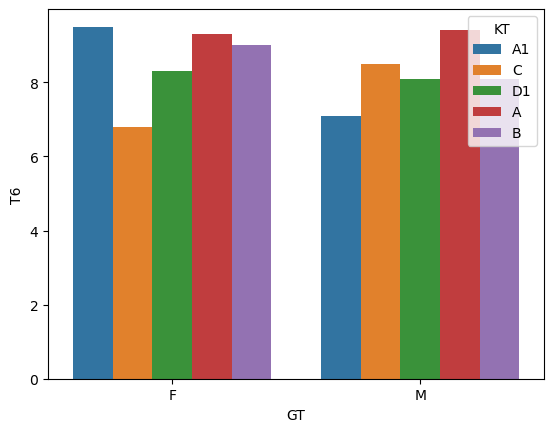

In [102]:
#So sánh điểm cao nhất của NGONNGU theo nhóm GT theo KT
#Lưu ý: không để estimator thì mặc định là mean (trung bình)
sns.barplot(x='GT', y='T6', hue='KT', data=df, errorbar=None, estimator=max)
plt.show()

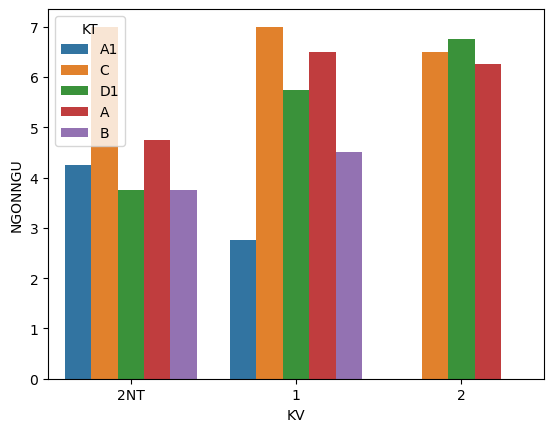

In [103]:
#Khi biến định tính dùng làm nhóm tổng hợp
#Có nhiều hơn 2 giá trị hoặc có giá trị thiếu của:
#Điểm NGONNGU trên từng nhóm
#Thì dùng hàm tổng hợp thông qua numpy
import numpy as np
sns.barplot(x='KV', y='NGONNGU', hue='KT', data=df, errorbar=None, estimator=np.max)
plt.show()

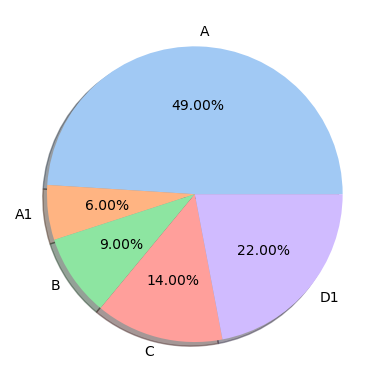

In [104]:
gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index #labels = ['A','A1','B','C',D1']
data=list(gb['count'])

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

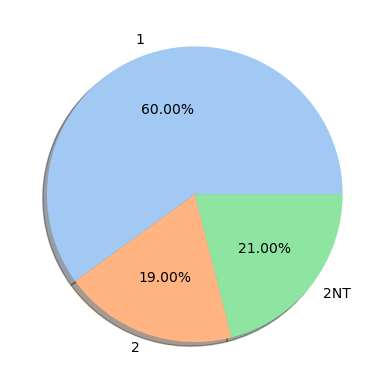

In [105]:
gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index #labels = ['A','A1','B','C',D1']
data=list(gb['count'])

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

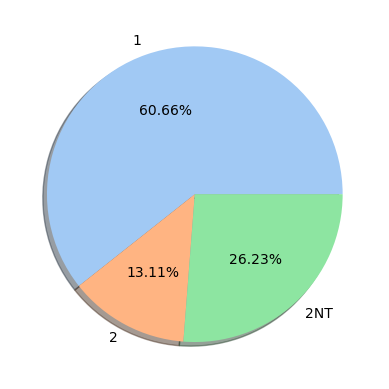

In [106]:
#trực quan tỉ lệ phần trăm tổng điểm DIEMCONG trên từng nhóm kv
gb = df.groupby(['KV'])['DIEMCONG'].agg(['sum'])

labels = gb.index #labels = ['A','A1','B','C',D1']
data=list(gb['sum'])

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.show()

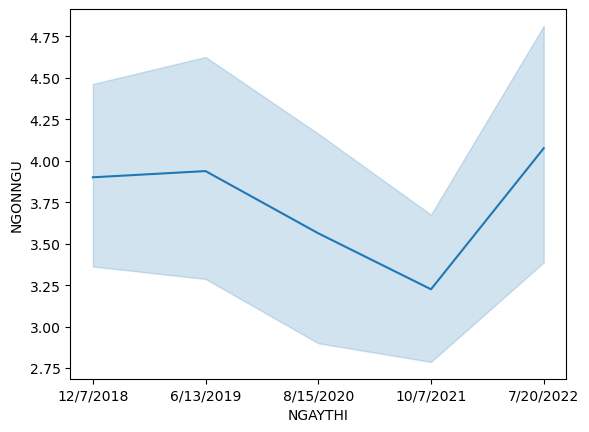

In [107]:
#Biểu đồ line thường dùng để tổng hợp dữ liệu theo trục 'thời gian'
#hoặc 'có thứ tự'
#Ví dụ: tổng hợp trung bình điểm NGONNGU theo NGAYTHI
sns.lineplot(x='NGAYTHI', y='NGONNGU',data=df)
plt.show()

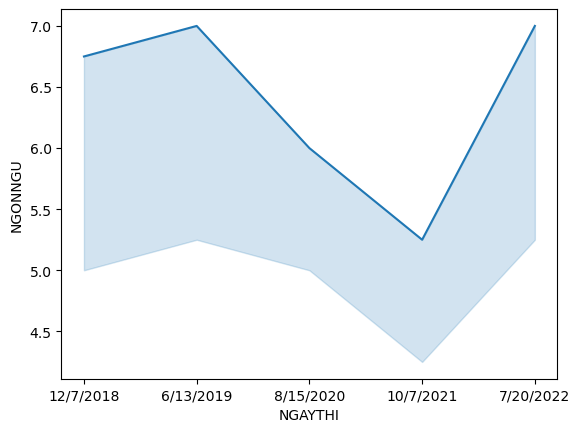

In [108]:
sns.lineplot(x='NGAYTHI', y='NGONNGU',data=df,estimator=np.max)
plt.show()

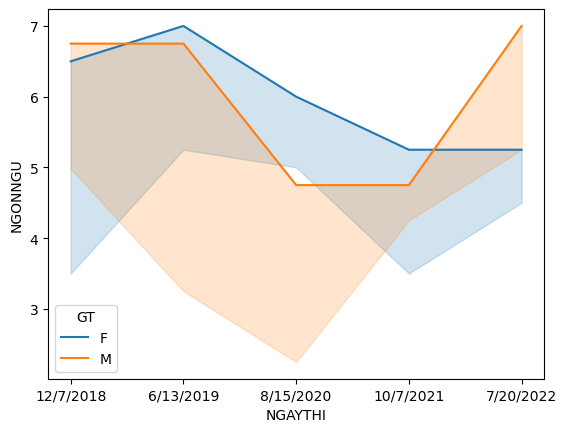

In [109]:
#Tổng hợp điểm NGONNGU lớn nhất theo các năm thi trên từng nhóm giới tính bằng biểu đồ line
sns.lineplot(x='NGAYTHI', y='NGONNGU',hue='GT', data=df,estimator=np.max)
plt.show()

In [110]:
#Space

In [111]:
#Mô tả sự tập trung
#min,max
#mean (dễ bị tác động) bởi các giá trị bất thường (abnomouse)
#VD: 1, 2, 1, 2, 2 => mean = 1.6
#: 1, 2, 2, 100, 2 => mean = 21.4

#median: Trung vị cho biết 50% số pt có giá trị > median và 50% số pt có giá trị < median
#VD: 5, 2, 1, 4, 5 => 1 2 < [4] < 5 5
#VD: 5, 5, 10, 2, 0, 1 => 0 1 < [2 5 = 3.5] < 5 10

In [112]:
#Mode (yếu vị): Cho biết giá trị pt có giá trị là bao nhiêu:
#VD: 1, 1, 1, 0.5,1 ,2 media = 1
# Mods không bị tác động bởi abmosnual

#Phân vị là các đại lượng chứa tệp dữ liệu (thành phân vị có số lượng dl bằng nhau, Thông thường dùng tứ phân vị)
         #Median
#--|--------|----|--
#  Q1       Q2   Q3
#|2QIR=Q3-Q1|

In [113]:
#Tuần 03
#Phân tích mô tả định lượng
#Mục đích: Mô tả các tri thức đang ẩn chưa bên trong dữ liệu, thông qua ý nghãi các đại lượng mô tả toán học

#Bước 1: Mô tả biến định lượng

df['NGONNGU'].describe()
#Giải thích ý nghĩa các đại lượng (thêm variance)

count    100.000000
mean       3.740000
std        1.424408
min        1.000000
25%        2.500000
50%        3.625000
75%        4.750000
max        7.000000
Name: NGONNGU, dtype: float64

In [114]:
print(f'{df["NGONNGU"].min()} \n {df["NGONNGU"].max()} \n')
print(f'{df["NGONNGU"].mean()} \n {df["NGONNGU"].median()} \n')
print(f'{df["NGONNGU"].mode()} \n')
print(f'{df["NGONNGU"].quantile(0.25)} \n')

1.0 
 7.0 

3.74 
 3.625 

0    2.0
Name: NGONNGU, dtype: float64 

2.5 



In [115]:
#Đo lường độ phân tán(Biến thiên, biến động, hỗn độn)
#Biến động càng cao -> độ ổn định càng thấp và ngược lại
#-> Khó đưa ra quyết định
#Muốn kinh doanh món hàng A
#10, 11, 10, 12, 11 ( Ông A ) - Ổn định cao
#100, 12, 50, 75, 35 ( Ông B ) - Ổn định thấp
#Công thức:
#Range = max - min ( Range càng cao thì biến động cao )
#IQR = Q3-Q1

df["NGONNGU"].max() - df["NGONNGU"].min()

6.0

In [116]:
df["NGONNGU"].quantile(0.75) - df["NGONNGU"].quantile(0.25) 

2.25

In [117]:
#Bài tập
#Tính phân vị thứ 9 trong thập phân vị cho T5 và T6
#Tính range cho T5 và T6
df[["T5", "T6"]].max() - df[["T5", "T6"]].min()
#Tính khoảng IQR cho T5 và T6
#Độ lệch trung bình T5 và T6

T5    6.5
T6    5.8
dtype: float64

In [118]:
#Độ lệch trung bình
import numpy as np
np.mean(np.abs(df["NGONNGU"] - np.mean(df["NGONNGU"])))

1.1600000000000001

In [119]:
#Tính độ lệch trung bình cho T5 và T6
np.mean(np.abs(df["T5"] - np.mean(df["T5"])))


1.18364

In [120]:
np.mean(np.abs(df["T6"] - np.mean(df["T6"])))

1.09952

In [121]:
print(f'{df["T5"].mean()} \n {df["T5"].median()} \n')

6.7170000000000005 
 6.8 



In [122]:
#Phương sai ký hiệu (xích ma bình phương) ( var )
 
df["NGONNGU"].var()

2.0289393939393956

In [123]:
#Độ lệch chuẩn (std)
df["NGONNGU"].std()

1.4244084364884237

In [124]:
#PP để đo so sánh mức độ biến động của 2 biến số
#mức độ biến động của hai hay nhiều biến số
#Phương pháp sử dụng std để so sánh
#VD so sánh mức độ biến động của T5 và T6
print(df[["T5", "T6"]].mean())
print(df[["T5", "T6"]].std())
#Lưu ý: cần đảm bảo T5 và T6 cùng hệ quy chiếu ( độ đo đơn vị so sánh )
#Và trung bình T5 và T6 xấp xỉ nhau

T5    6.717
T6    6.937
dtype: float64
T5    1.478059
T6    1.363200
dtype: float64


In [125]:
#Phương pháp dùng Confficient of variance (CV) để 
#đo mức độ biến động của hai hay nhiều biến số
df[["LOGIC", "NGONNGU"]].std()/df[["LOGIC", "NGONNGU"]].mean()

#Hãy so sánh mức độ biến động của LOGIC và NGONNGU

LOGIC      0.249131
NGONNGU    0.380858
dtype: float64

In [126]:
df[['NGONNGU', "LOGIC","UNGXU"]].describe()
#So sánh mức độ ổn định của điểm số
#trong kì thi đánh giá năng lực
#Hãy cho biết mức độ ổn định trong 3 cột điểm
#gợi ý: hướng dẫn giá trị CV (cofficient of variant)

,NGONNGU,LOGIC,UNGXU
count,100.000000,100.000000,100.000000
mean,3.740000,4.255000,4.875000
std,1.424408,1.060053,1.041136
min,1.000000,1.500000,2.750000
25%,2.500000,3.500000,4.250000
50%,3.625000,4.125000,4.750000
75%,4.750000,4.750000,5.500000
max,7.000000,8.000000,8.000000


In [127]:
cv = df[["NGONNGU", "LOGIC", "UNGXU"]].std() / df[["NGONNGU", "LOGIC", "UNGXU"]].mean()
list(cv)

#Bài tập: Sinh viên viết code tìm ra môn có độ ổn định nhất và độ biến động cao nhất

[0.38085787071882987, 0.2491311130540305, 0.2135664058628459]

In [128]:
df.groupby("GT")["NGONNGU"].describe()
#Câu hỏi: nhóm GT nào thi tốt hơn

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,3.854167,1.348594,1.25,3.1875,3.75,5.0,7.0
M,52.0,3.634615,1.496288,1.00,2.4375,3.50,4.5,7.0


In [129]:
#Câu hỏi: Sinh viên có giới tính nam thì thi môn nào tốt hơn so với nữ
df.groupby("GT")["LOGIC"].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,4.046875,1.021909,1.5,3.50,4.0,4.5,6.75
M,52.0,4.447115,1.067956,2.5,3.75,4.5,5.0,8.00


In [130]:
df.groupby("GT")["UNGXU"].describe()

,count,mean,std,min,25%,50%,75%,max
GT,,,,,,,,
F,48.0,4.906250,0.946192,3.25,4.2500,4.875,5.5,7.25
M,52.0,4.846154,1.130194,2.75,4.1875,4.625,5.5,8.00


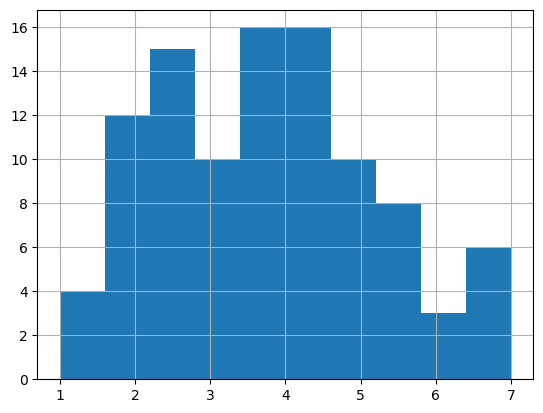

In [131]:
#Histogram là biểu đồ mô tả phân phối xác xuất của biến định lượng
#Mực đích: Cho biết xác xuất xảy ra của biến cố trong khoảng giá trị dữ liệu nào nhiều nhất
df["NGONNGU"].hist()
plt.show()

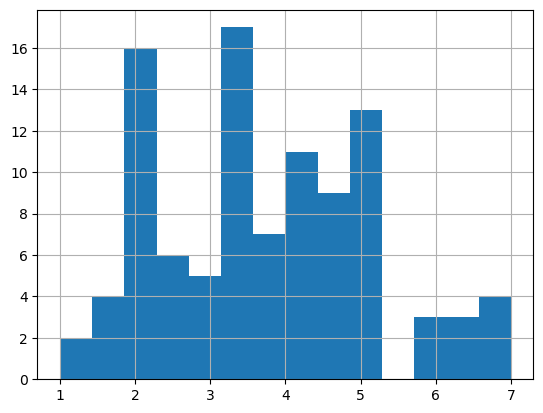

In [132]:
#Hướng dẫn vẽ bins trong histogram
#Lưu ý: Khi số lượng bins khác nhau sẽ dẫn đến hình dáng của his khác nhau

df["NGONNGU"].hist(bins=14)
plt.show()

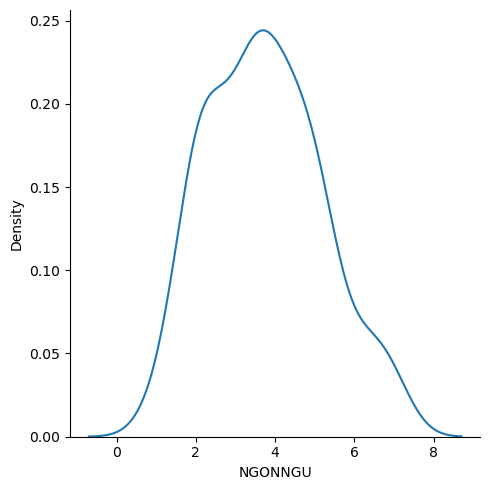

In [133]:
#Nâng cao hơn hist thì ta khám phá dạng mịn của xác xuất
#Làm mịn với phân phối xác xuất

import seaborn as sns

sns.displot(df, x="NGONNGU", kind='kde')
plt.show()

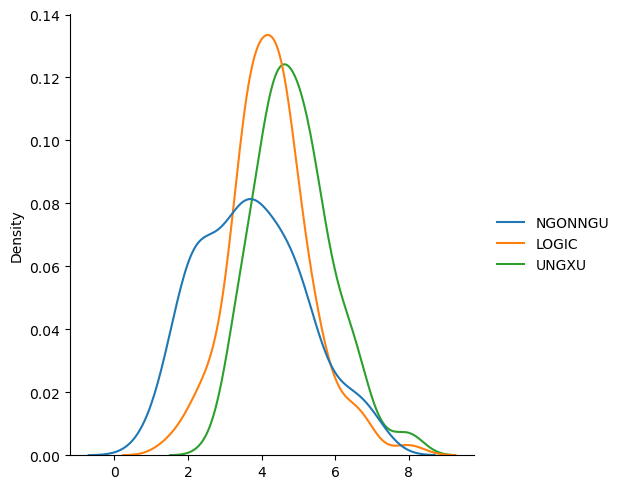

In [134]:
sns.displot(data= df[["NGONNGU", "LOGIC", "UNGXU"]],kind="kde")
plt.show()
#Hãy cho biết phân phối của biến số nào gần với phân phối chuẩn hơn

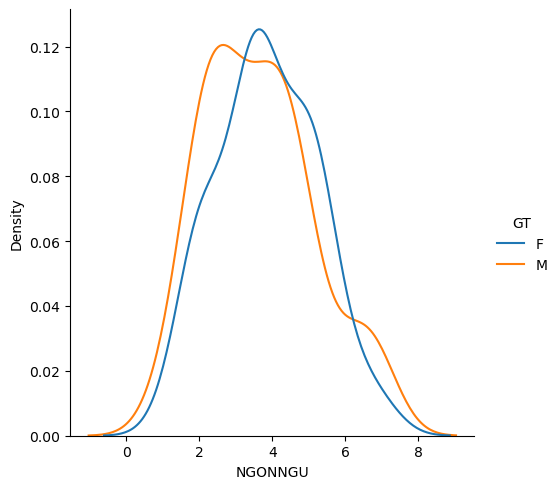

In [135]:
sns.displot(df, x="NGONNGU", hue="GT", kind="kde")
plt.show()
#Nhóm GT nào có phân phối điểm gần phân phối chuẩn

In [136]:
#Tuần 04
#skewness = độ xiên, độ lớn ( trị tuyệt đối ) cho biết mức độ dữ liệu
#lệch nhiều hay ít so voiwis đuognừ cong phân phối chuẩn.
#Cho biết xác xuất được phân bố lệch về phía nào nhiều

#Trị tuyệt đối giá trị càng lớn thì dữ liệu phân phối nghiêng càng nhiều (lệch)

#Diễn giải cho skewness
#skewness > 0 tức là mean > median : ta gọi postivie skewness hay lệch phải, tức là giá trị ngoại biên 
#outline nhận giá trị lớn sẽ đẩy giá trị trung bình về cuối

#...

df['NGONNGU'].skew()

0.33322084231625376

In [137]:
df[['NGONNGU','LOGIC','UNGXU']].skew()
#Note:: khi phân tích dữ liệu với các phương pháp có liên quan
#nếu dữ liệu quá lệch so với phân phối chuẩn thì
#ta cần điều chỉnh bằng các hàm transform cho bớt lệch
#đặc biệt là phân tích hồi quy

#3 cái trên thì thằng 'UNGXU' lệch nhiêu nhất

NGONNGU    0.333221
LOGIC      0.472551
UNGXU      0.607063
dtype: float64

In [138]:
#Kurtosis (Pearson Kurtosis): Độ nhọn, trị tuyệt đối cho biết mức độ

#Giá trị của kutorsis:
#Càng gần 3 thì fit
#Dưới 3 là fat
#Trên 3 là thin

#Thông thường để đánh giá hình dáng độ nhọn ta dùng đại lượng 
#excess kutorsis ( còn gọi là fisher kurtosis) = kurtosis -3
#Nếu excess > 0 -> thin
#Nếu excess = 0 -> fit
#Nếu excess < 0 -> fat

df[['NGONNGU']].kurtosis()

NGONNGU   -0.517004
dtype: float64

In [139]:
df[['NGONNGU','LOGIC','UNGXU']].kurtosis()

NGONNGU   -0.517004
LOGIC      1.372439
UNGXU      0.442173
dtype: float64

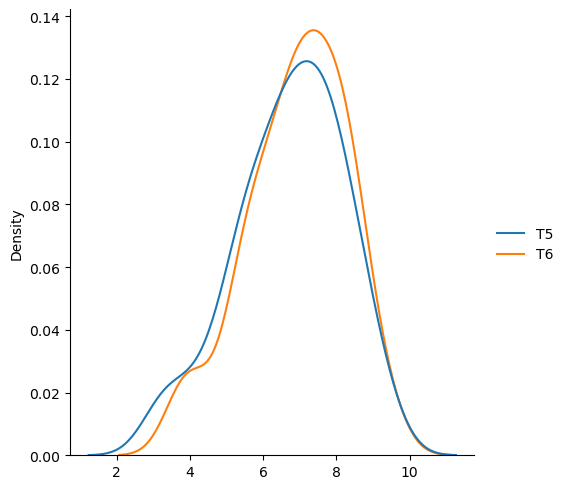

In [140]:
sns.displot(data = df[['T5','T6']], kind='kde')
plt.show()

#Nhìn biểu đồ cho biết ý nghĩa kurtorsis của T5,T6

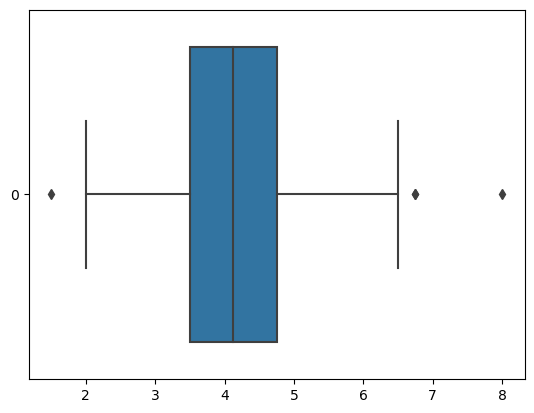

In [141]:
#Đây là biểu đồ quan trọng trong việc phân tích dữ liệu định lượng
#Biểu đồ này cung cấp các thông tin quan trọng như:
#1. Q1: Tứ phân vị 25%
#2. Q2: Tứ phân vị 50% (median)
#3. Q3: Tứ phân vị 75%
#4. Độ lớn IQR = |Q3-Q1|
#5. Lower bound = Q1 - 1.5*IQR
#6. Upper bound = Q3 + 1.5*IQR
#7. Các ngoại biên, bất thường ( outlier) cần xử lý trong dữ liệu
#Outlier: Là điểm dữ liệu khác biệt quá nhiều so với đa số
#hướng dẫn
#  +Tính khoảng nghi ngờ chứa outliers

sns.boxplot(data=df['LOGIC'], orient="h")
plt.show() 

In [142]:
#Hãy tính khoảng giá trị nghi ngờ bất thường
#Hãy tính khoảng giá trị được cho là bất thường
#Hãy tính xem có bao nhiêu sinh viên có điểm thi là bất thường

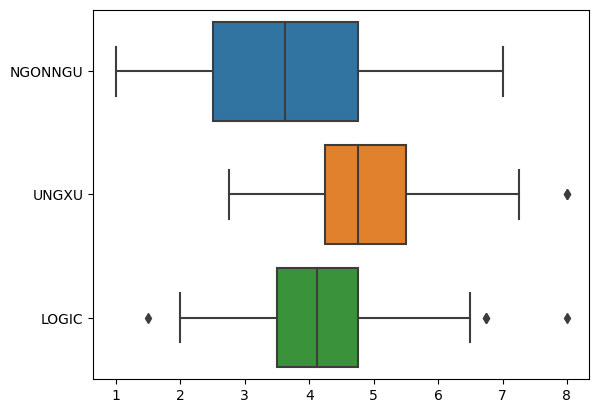

In [143]:
sns.boxplot(data=df[['NGONNGU','UNGXU','LOGIC']], orient="h")
plt.show()

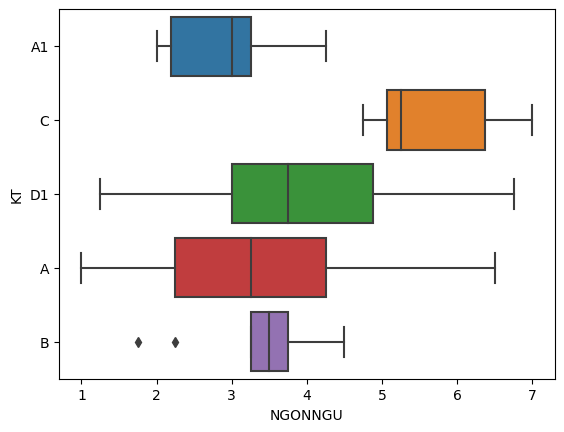

In [144]:
sns.boxplot(x='NGONNGU', y='KT',data=df,orient="h")
plt.show()

#Câu hỏi: khối thi nào có lower bound trùng với
#tứ phân vị thứ 1 (tức là Q1) ( Khối B )

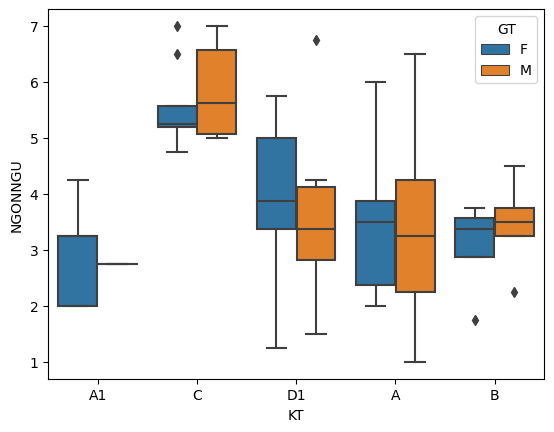

In [145]:
sns.boxplot(x='KT',y='NGONNGU',hue='GT', data=df)
plt.show()
#Câu hỏi: xác định các biểu đồ bất thường
#C của F
#M của D1
#B cả 2 GT

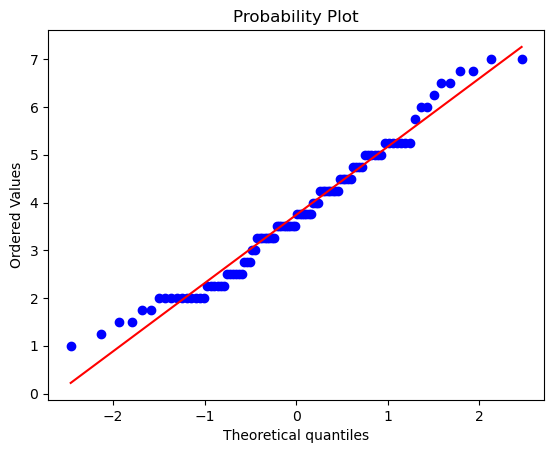

In [146]:
#Kiểm định phân phối chuẩn

from scipy import stats
stats.probplot(df['NGONNGU'],plot=sns.mpl.pyplot)
plt.show()

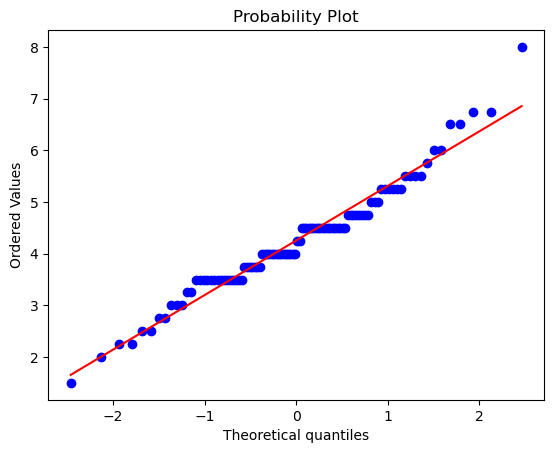

In [147]:
stats.probplot(df['LOGIC'],plot=sns.mpl.pyplot)
plt.show()

In [149]:
#Phân tích sự tác động ( ảnh hưởng ) qua lại giữa 2 biến định lượng
#PP1: Hiệp phương sai: co-variance
#Giá trị co-variance > 0 thì 2 biến có tương quan thuận ( đồng biên )
#Giá trị co-variance < 0 thì 2 biến có tương quan nghịch ( nghịch biên )
#Giá trị co-variance = 0 thì 2 biến không tương quan
#độ lớn (trị tuyệt đối của giá trị) càng lớn thì mức độ quan hệ(tương quan) chặt chẽ

#Mâ trận hiệp phương saii: co-variance matrix

df[['T5','T6']].cov()

,T5,T6
T5,2.184658,1.568961
T6,1.568961,1.858314


In [150]:
df[['T5','T6','LOGIC']].cov()

,T5,T6,LOGIC
T5,2.184658,1.568961,0.289308
T6,1.568961,1.858314,0.435672
LOGIC,0.289308,0.435672,1.123712


In [151]:
#Với phương pháp so sánh tương quan bằng co-variance
#Thì ta không đo lường được
#Cường độ tương quan giữa 2 biến định lượng

#Pearson Corelation: Tương quan tuyến tính
#r nằm trong khoảng [-1,1]
#r = 0 => không tương quan
#r < 0: tương quan nghịch
#r > 0 tương quan thuận
#|r| càng gần 1 thì tương quan càng cao
#|r| < 0.5 thì tương quan thấp
#|0.5, 0.65| : khá
#|0.65, 0.75|: tốt
#|0.75, 0.9|: Rất tốt
#> 0.9: hoàn hảo

#Ma trận tương quan

#Lưu ý: được sử dụng trong khảo sát tương quan tuyến tính nhằm 
#phân tích mối quan hệ tuyến tính giữa 2 biến định lượng

df[['T5','T6']].corr()
#Tương quan thuận
#T5 tăng thì T6 cũng tặng

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


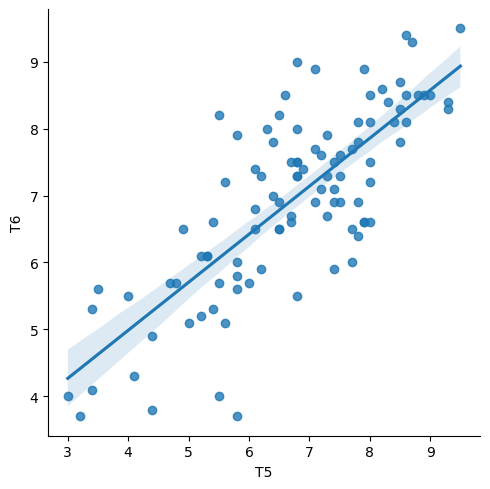

In [152]:
#Trực quan hóa tương quan tuyến tính giữa 2 biến định lượng
#Khám phá tương quan tuyến tính của 2 biến định lượng
#Thông qua biểu đồ phân tán (Scatter)

sns.lmplot(data=df, x='T5', y='T6', fit_reg=True)
plt.show()

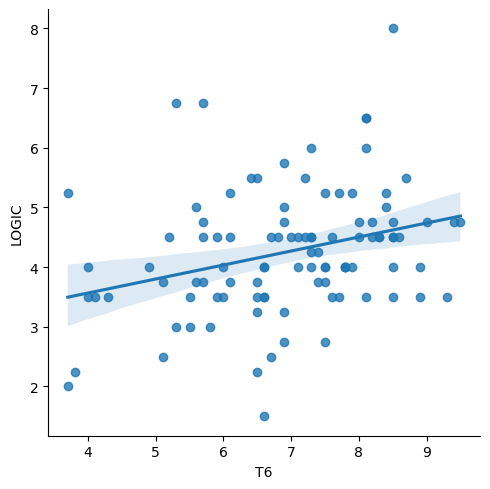

In [153]:
sns.lmplot(data=df, x='T6', y='LOGIC', fit_reg=True)
plt.show()

In [154]:
df[['T6','NGONNGU','LOGIC','UNGXU']].corr()

,T6,NGONNGU,LOGIC,UNGXU
T6,1.000000,-0.033360,0.301490,0.045638
NGONNGU,-0.033360,1.000000,0.035154,0.018731
LOGIC,0.301490,0.035154,1.000000,-0.091523
UNGXU,0.045638,0.018731,-0.091523,1.000000
